#### This tutorial introduces how to create basic visualizations of a large data set using Python. 

#### <mark>Yellow highlights indicate a small exercise or task for you to try out.</mark>
#### <mark> Remember to hit Shift+Enter in all the code cells. </mark>

<div class="alert alert-block alert-info">A cell like this indicates a question you need to answer for this Challenge on the U4I platform. Please answer the question before continuing through the notebook.</div>

# Introduction

The World Happiness Report is survey of the state of global happiness. It contains articles, and rankings of national happiness based on respondent ratings of their own lives. 
The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors.

In this tutorial, we will try to answer some questions by creating visualizations of the data:
- What countries rank the highest in overall happiness?
- What factors contribute to a country's happiness ranking?
- How did country ranks change from 2015 to 2017?
- Did any country experience a significant increase or decrease in happiness?

<b>We will work through a few different visualizations (listed below). You can follow these links to jump directly to a particular section/visualization.</b>
* [Variables](#1)
* [Import Libraries](#14)
* [Load & Prepare Data](#15)
* [Bar Graph](#2)
* [Scatter Plot](#3)
* [Pair Plot](#12) 
* [Heatmap](#9)
* [Box Plot](#10)

<a id=1></a>
## Variables
<mark>Can you hypothesize which variables might contribute more or less to the happiness score of a country?</mark>
* **Country**: Name of the country
* **Region**: Region the country belongs to
* **Happiness Rank**: Rank of the country based on the Happiness Score
* **Happiness Score**: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10, where 10 is the happiest?"
* **Economy**: GDP per capita
* **Family**: Social support
* **Health**: Healthy life expectancy
* **Freedom**: Freedom to make life choices
* **Trust**: Perceptions of corruption
* **Generosity**: Perceptions of generosity
* **Dystopia**: Each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark

<a id=14></a>
## Import Libraries

In [238]:
# import Pandas library and call it 'pd'
import pandas as pd

# import matplotlib.plplot and call it 'plt'
import matplotlib.pyplot as plt

#import numpy and call it 'np'
import numpy as np

#import seaborn and call it 'sns'
import seaborn as sns 

from pandas.plotting import autocorrelation_plot

%matplotlib inline
plt.style.use("seaborn-dark")

import warnings            
warnings.filterwarnings("ignore") 

<a id=15></a>
## Load & Prepare Data

In [239]:
#Load data from csv files and assign to "data_2015", "data_2016", "data_2017"
data_2015=pd.read_csv("2015.csv")
data_2016=pd.read_csv("2016.csv")
data_2017=pd.read_csv("2017.csv")

In [240]:
#Change column names so each data set has the same variable names
data_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2015.columns]
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.replace("."," ") for each in data_2017.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]

In [241]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [242]:
data_2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Lower,Upper,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [243]:
data_2017.head()

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


<a id=2></a>
**<h1>Bar Graph</h1>**

Let's start with an easy question: What are the happiest countries of the world in 2015?\
We can answer this question with a bar graph. 

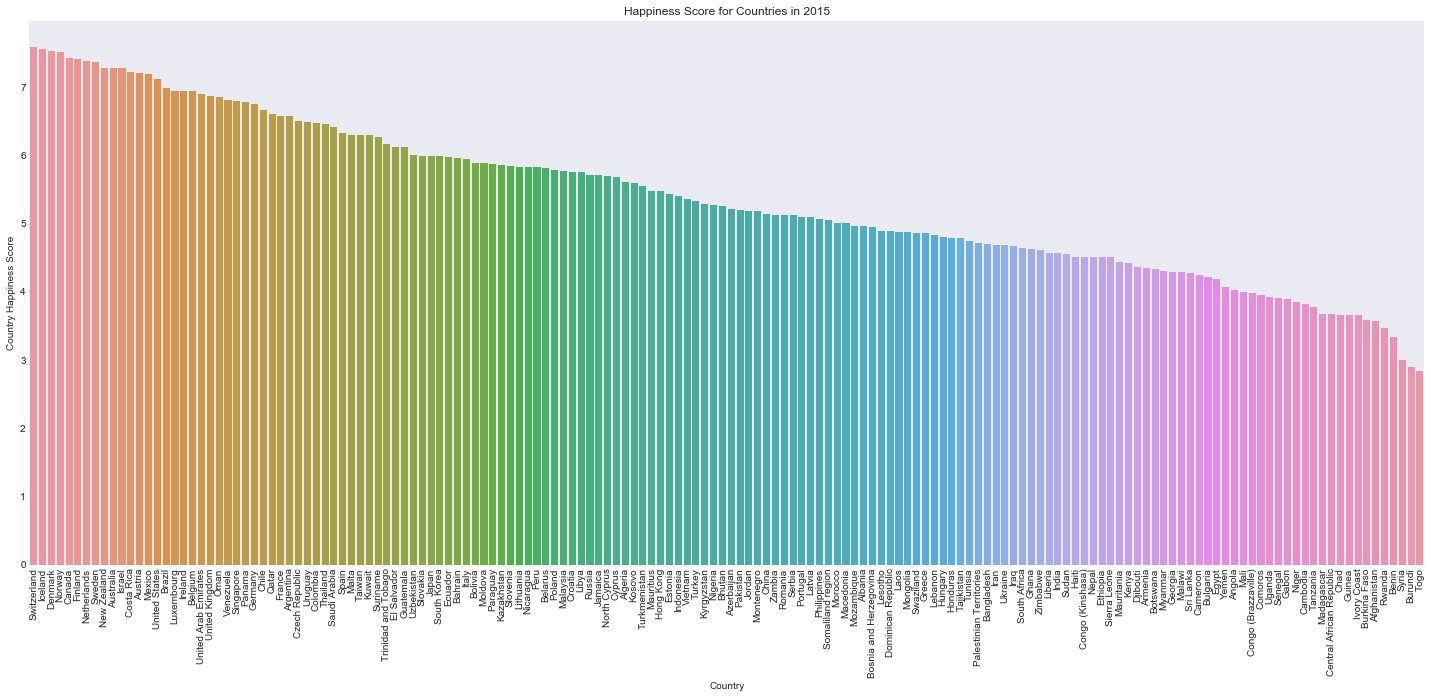

In [244]:
# Create bar graph
plt.figure(figsize=(25,10))
sns.barplot(x=data_2015['Country'], y=data_2015['Happiness_Score'])
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Country Happiness Score')
plt.title('Happiness Score for Countries in 2015')
plt.show()

This graph has a lot of information, so let's try to condense it by grouping countries by region and creating a new variable "region_happiness_ratio" (the sum of happiness_score for all the countries in a region divided by the number of countries in the region).

In [245]:
#Create data frame "sorted_data_2015" with region and region_happiness_ratio
region_lists=list(data_2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data_2015 = data.reindex(new_index)

#Show new data frame
sorted_data_2015

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


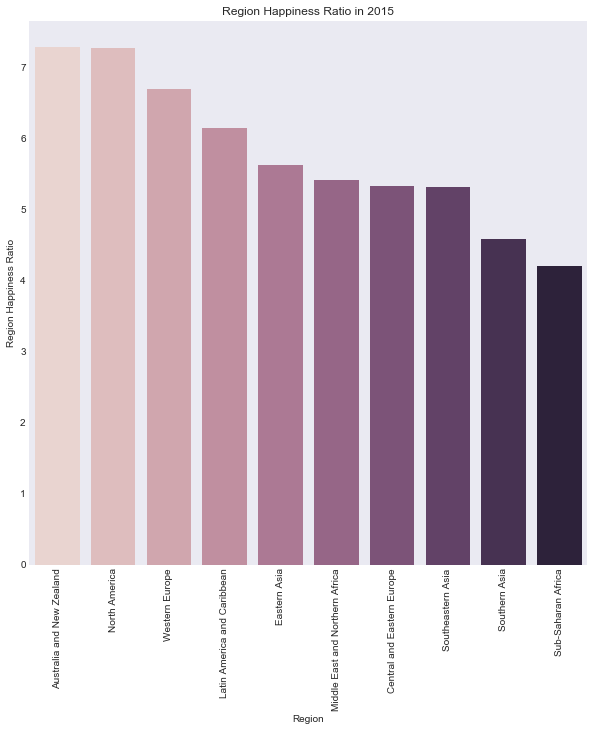

In [246]:
#Create a bar graph for region happiness ratio in 2015
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_data_2015['region'], y=sorted_data_2015['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Region Happiness Ratio in 2015')
plt.show()

<div class="alert alert-block alert-info">Create another bar graph for the region happiness ratio in 2016 (use the code cell below) and answer Q1 on the U4I platform. Remember to first create a new data frame called "sorted_data_2016".</div>

In [247]:
# your code here

Now that we know the which countries and regions are the happiest, let's find out which factors affect happiness.

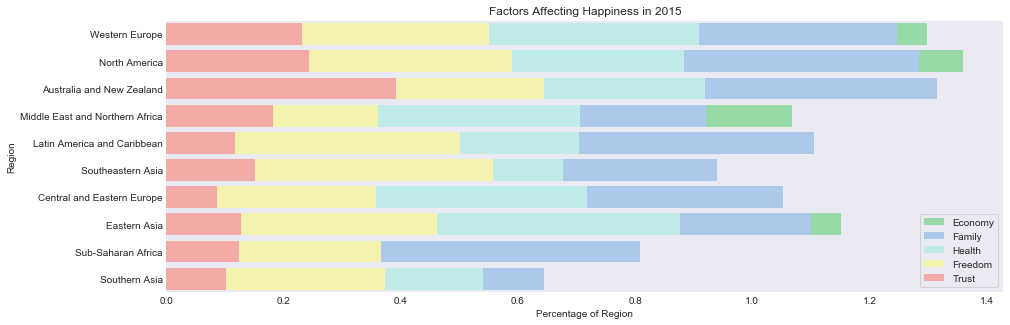

In [248]:
#Create horizontal bar plot for factors affecting happiness in 2015
region_lists=list(data_2015['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))
#Visualization
f,ax = plt.subplots(figsize = (15,5))
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors Affecting Happiness in 2015")
plt.show()

<a id=3></a>
**<h1>Scatter Plot</h1>**

A scatter plot can be used to visualize whether there is a correlation (relationship) between two variables (i.e., whether the increase or decrease in one varaible depends on the increase or decrease of the other variable.\
What is the correlation between economy and happiness_score for countires in 2015?

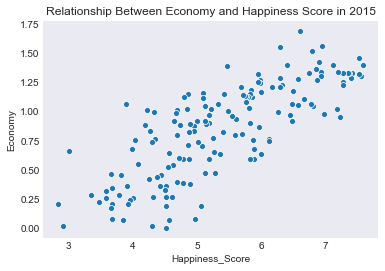

In [249]:
#Create scatter plot for varaibles economy and happiness_score for data_2015
sns.scatterplot(x=data_2015["Happiness_Score"], y=data_2015["Economy"])
plt.title("Relationship Between Economy and Happiness Score in 2015")
plt.show()

<div class="alert alert-block alert-info">Create another scatter plot for any two variables in the data set "data_2017" (use the code cell below) and answer Q2 on the U4I platform. 

In [250]:
# your code here

<a id=12></a>
**<h1>Pair Plot</h1>**
A pair plot allows us to see the distribution of single variables and the relationships between variables for all the variables in a data set. Pair plots are useful for identifying trends to follow up on in large data sets with several variables.

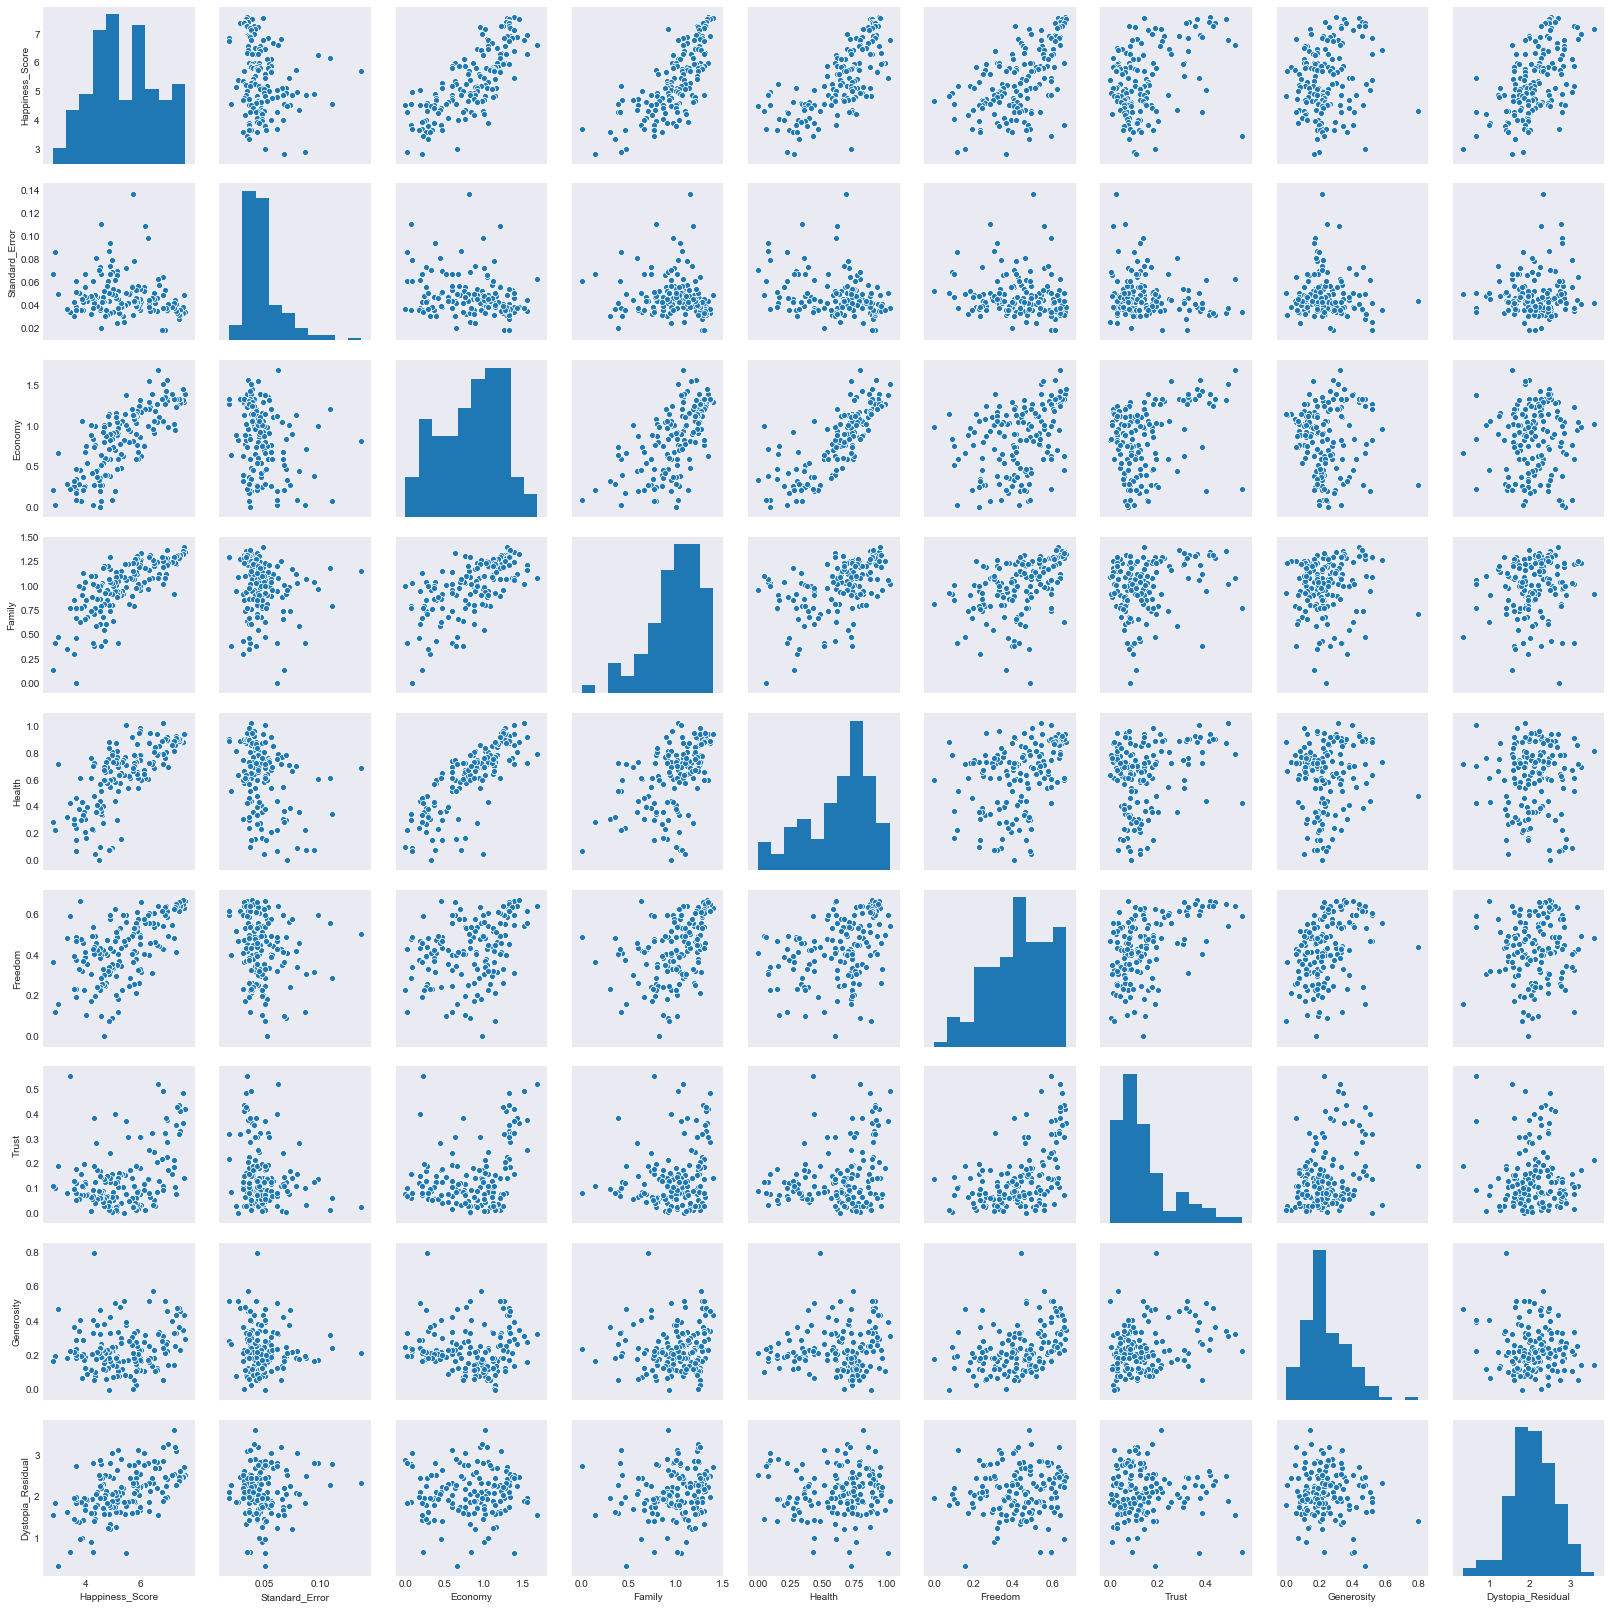

In [261]:
#Drop column "Happiness_Rank"
data_2015_pp = data_2015.drop('Happiness_Rank', 1)

#Create a pair plot for data_2015_pp
sns.pairplot(data_2015_pp)
plt.show()

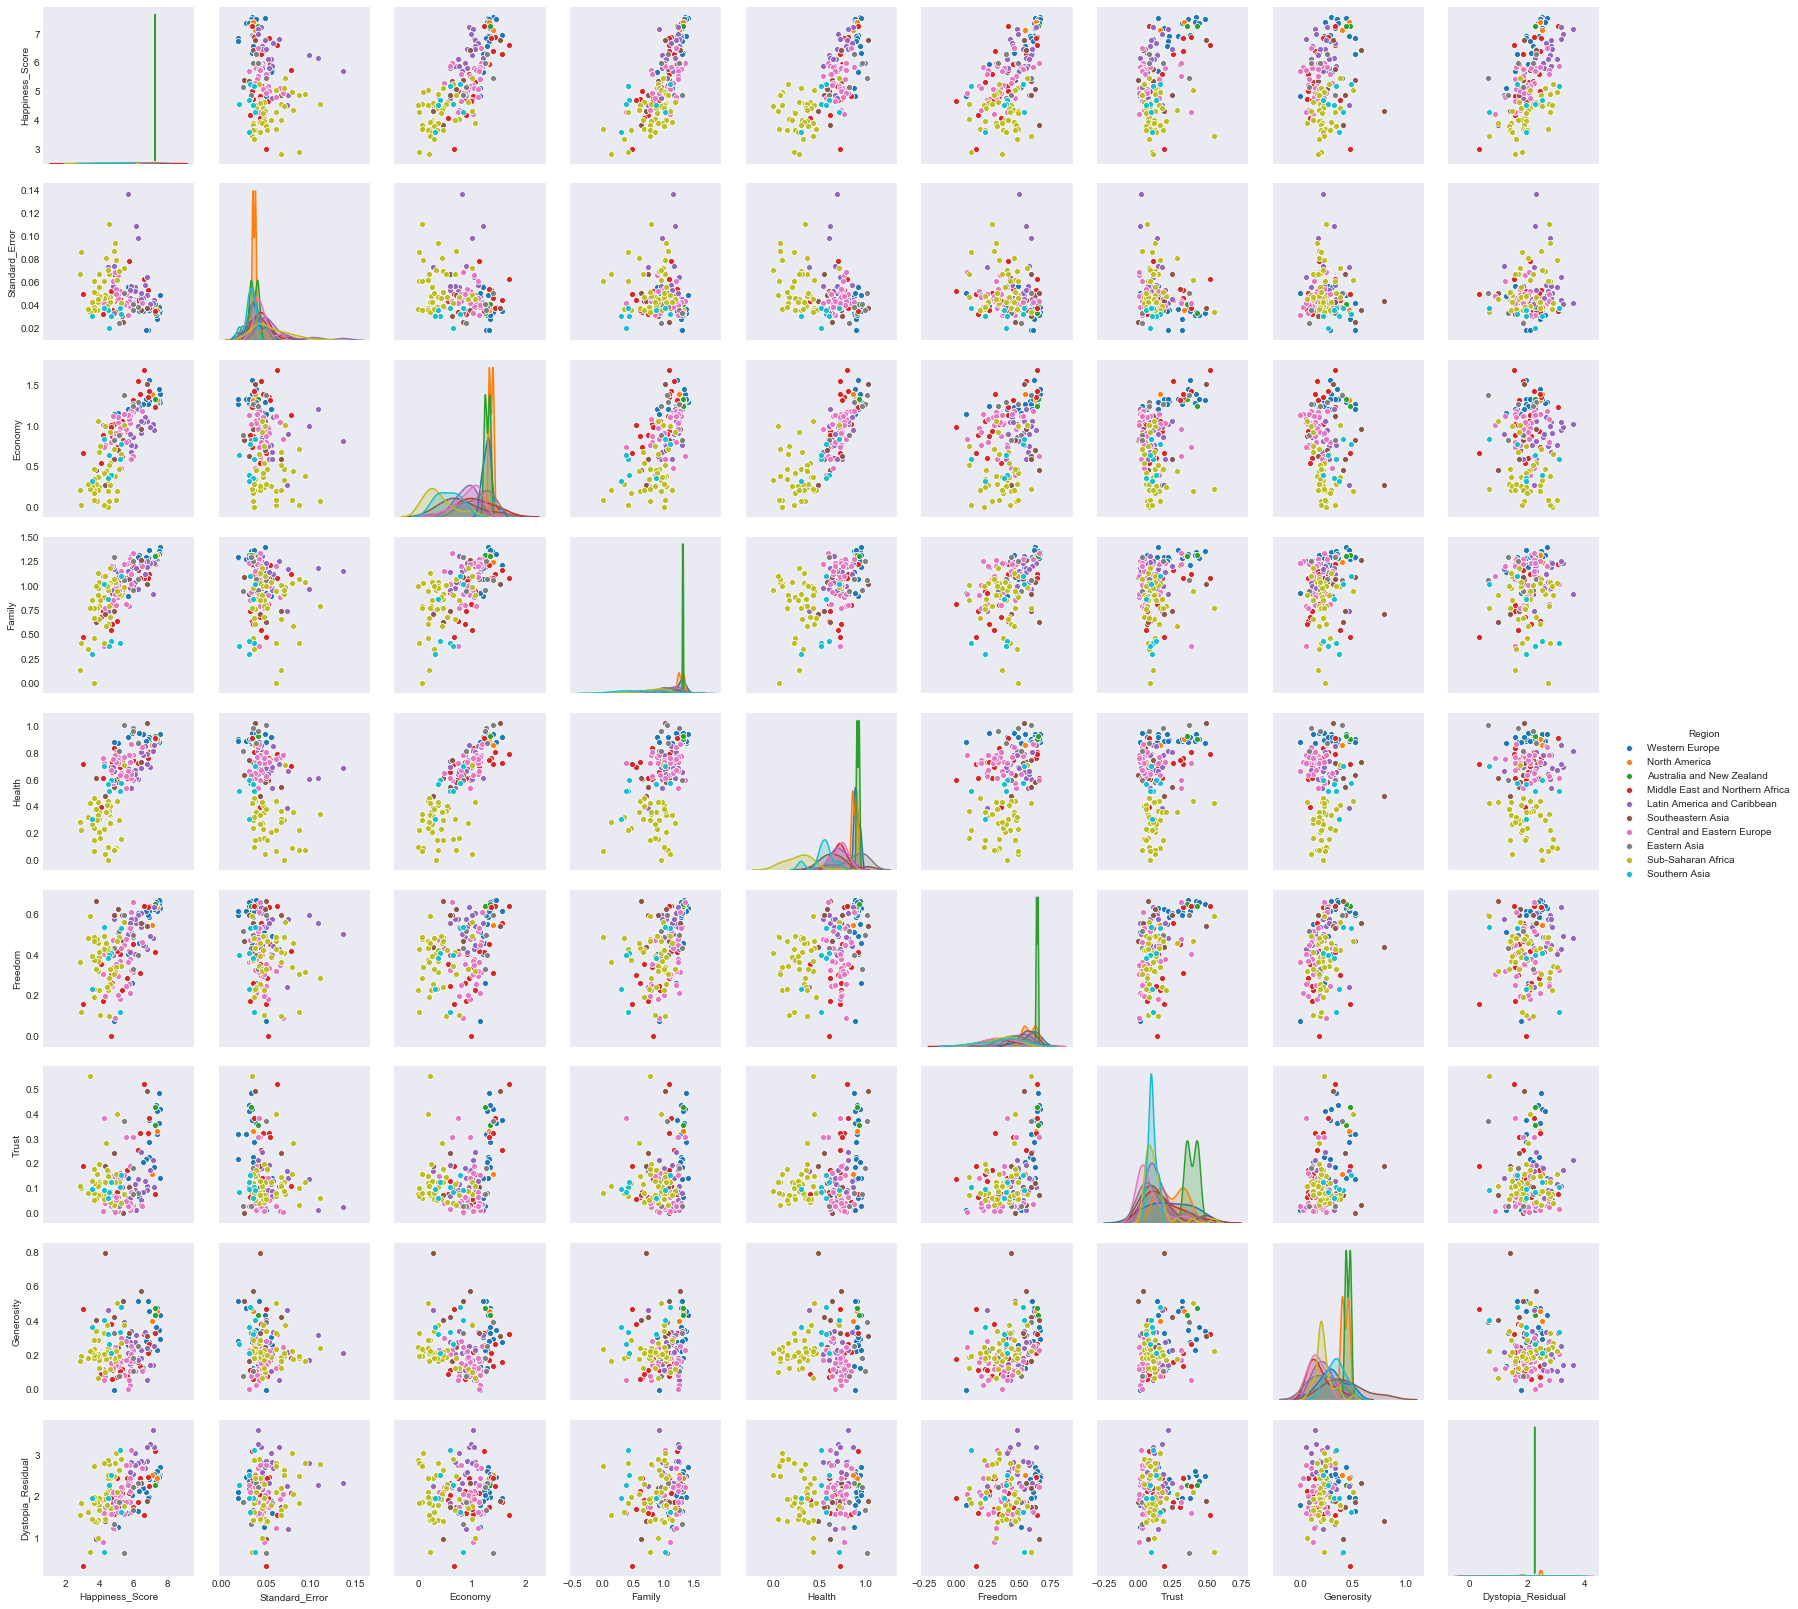

In [263]:
sns.pairplot(data_2015_pp, hue="Region")
plt.show()

<a id=9></a>
**<h1>Heatmap</h1>**
We can also visualize correlations between variables with a heat map. 

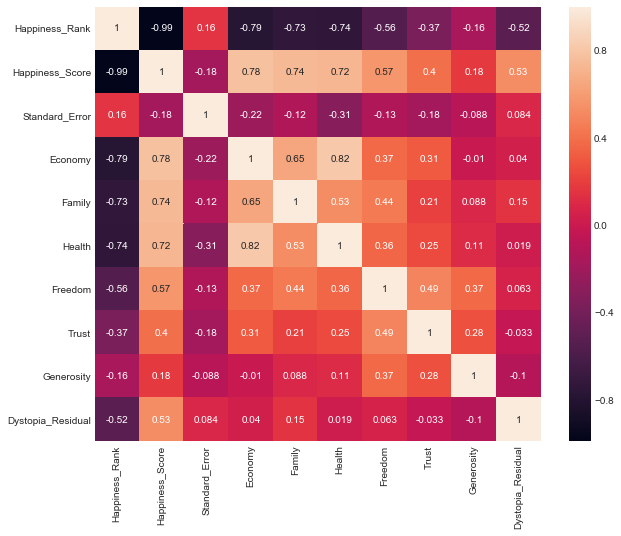

In [275]:
#Create heatmap for data_2015
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data_2015.corr(),annot=True)
plt.show()

<div class="alert alert-block alert-info">Create another heatmap for "data_2016" (use the code cell below) and answer Q3 on the U4I platform.

In [278]:
#your code here

<a id=10></a>
**<h1>Box Plot</h1>**
A box plot displays the distribution of a data set based on 5 points: the minimum, first quartile, median, third quartile, and maximum. Box plots also show outliers in the data set.


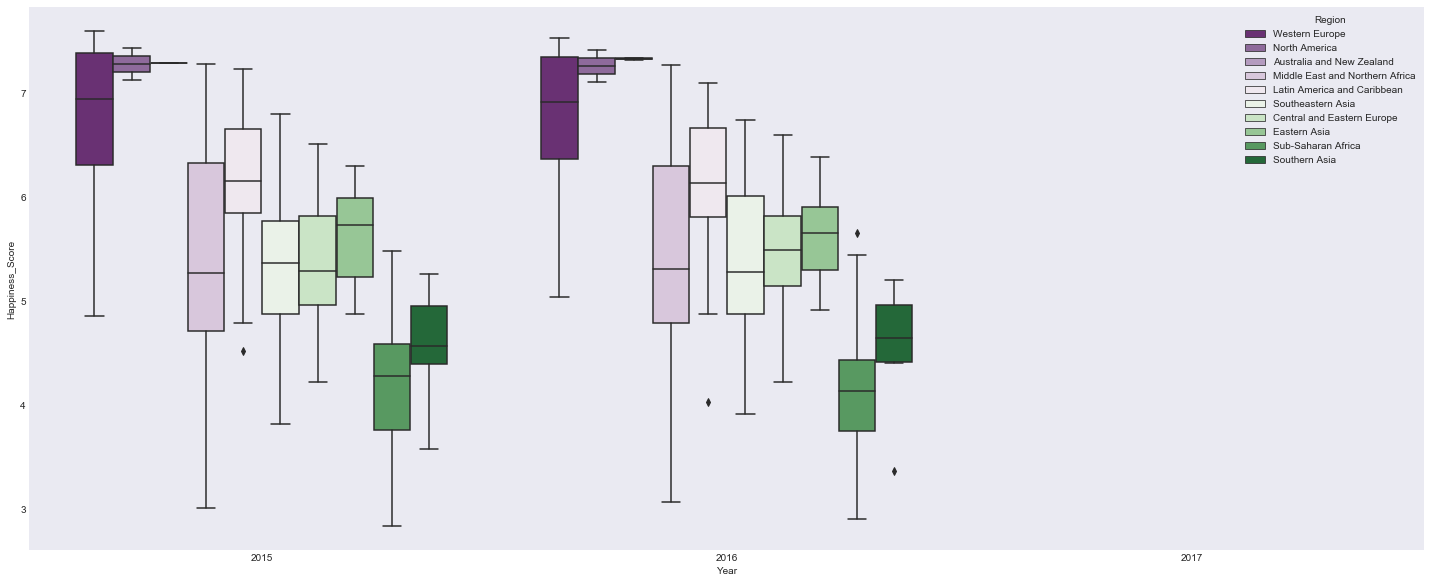

In [281]:
#Create box plot
f,ax = plt.subplots(figsize =(25,10))
sns.boxplot(x="Year" , y="Happiness_Score", hue="Region",data=data_concat,palette="PRGn",ax=ax)
plt.show()

<div class="alert alert-block alert-info">Answer Q4 on the U4I platform. (Why is there no visualization for 2017? Hint: Look back at the variable names (column names) in each data set.)

Sources:
https://www.kaggle.com/saduman/eda-and-data-visualization-with-seaborn/notebook
https://en.wikipedia.org/wiki/World_Happiness_Report